<h2>Get movie name list</h2>

In [1]:
import pandas as pd
import numpy as np

In [24]:
df_imdb = pd.read_csv('IMDB.csv')
type(df_imdb['Name'][0])

str

In [26]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 7 columns):
Unnamed: 0    2686 non-null int64
Name          2686 non-null object
Genre         2686 non-null object
Rating        2686 non-null float64
Votes         2686 non-null int64
BoxOffice     2686 non-null object
Year          2686 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 147.0+ KB


In [27]:
movie_list = []
for item in df_imdb.index:
    movie_list.append(df_imdb['Name'][item])

In [29]:
df_the = pd.read_csv('the_movie_bd_names.csv')

In [31]:
df_the.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 1 columns):
Movie    3780 non-null object
dtypes: object(1)
memory usage: 29.6+ KB


In [30]:
movie_list2 = []
for item in df_the.index:
    movie_list2.append(df_the['Movie'][item])

In [32]:
movie_list_combine = []
movie_list_combine = movie_list + [x for x in movie_list2 if x not in movie_list]

In [33]:
df = pd.DataFrame(movie_list_combine)
df.columns=['movie name']

In [34]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Combined movie names.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='movie_info')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<h2>Scrap data from rotten tomatoes</h2>

In [2]:
df_r = pd.read_csv('Combined movie names.csv')

In [12]:
#df_r

In [3]:
list_r = []
for i in df_r.index:
    list_r.append(df_r['movie name'][i])

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
movie_url = []
for i in range(len(list_r)):
    movie_url.append('https://www.rottentomatoes.com/m/'+(list_r[i].replace(" ", "_")).lower())

In [13]:
#movie_url

In [7]:
movie_info3 = []
# tom_meter = []
# aud_score = []
# # meter_average_rate = []
# # aud_average_rate = []
# movie_name = []
# critics_consensus = []
for item in movie_url:
    try:
        data = requests.get(item, allow_redirects=False)
        if data.status_code == 200:
            data_h = BeautifulSoup(data.content,'lxml')

        moviename= item.split('m/')[-1].replace('_',' ')

        try:
            meter_score = data_h.find('span', class_ = "meter-value superPageFontColor").find('span').get_text().strip('\n')
        except:
            meter_score = np.NaN

        try:
            aud_score = data_h.find('div', class_="audience-score meter").find('span',class_ = 'superPageFontColor').get_text()
        except:
            aud_score = np.NaN
    
            
#         try:
#             cc = data_h.find('p', class_ = "critic_consensus superPageFontColor").get_text()
#         except:
#             cc = np.NaN
        
        movie_info3.append([moviename,meter_score, aud_score])
    
    except:
        continue

In [26]:
data = requests.get('https://www.rottentomatoes.com/m/crazy_rich_asians', allow_redirects=False)
# data_h = BeautifulSoup(data.content,'lxml')

In [28]:
data_h.find('p', class_ = "critic_consensus superPageFontColor").get_text()#.find('span', class_ = "subtle superPageFontColor")

'\nCritics Consensus:\n                    With a terrific cast and a surfeit of visual razzle dazzle, Crazy Rich Asians takes a satisfying step forward for screen representation while deftly drawing inspiration from the classic -- and still effective -- rom-com formula.\n                '

In [19]:
len(movie_info)

350

In [24]:
len(movie_info2)

1464

In [9]:
len(movie_info3)

4890

In [14]:
#movie_info3

In [ ]:
df = pd.DataFrame(movie_info3)
df.columns=['movie name','meter_score','audience_score']

In [12]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Rotten Tomatoes.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='movie_info')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<h2>Combine dataset</h2>

In [2]:
import pandas as pd
import numpy as np

In [6]:
df_t = pd.read_csv('tmdb_new.csv')
len(df_t)

3774

In [7]:
df_i = pd.read_csv('IMDB.csv')
len(df_i)

2686

In [8]:
df_combine = df_t.merge(df_i, how = 'left', left_on = 'Movie', right_on = 'Name')

In [9]:
len(df_combine)

3779

In [9]:
df_combine

,Movie,Release_date,Language,Runtime,Budget,Revenue,Unnamed: 0,Name,Genre,Rating,Votes,BoxOffice,Year
0,The Avengers,"May 4, 2012",English,2h 23m,"$220,000,000.00","$1,519,557,910.00",0.0,The Avengers,"Action, Adventure, Sci-Fi",8.1,1134273.0,"623,357,910",2012.0
1,Snow White and the Huntsman,"June 1, 2012",English,2h 7m,"$170,000,000.00","$396,600,000.00",16.0,Snow White and the Huntsman,"Action, Adventure, Drama",6.1,253972.0,"155,332,381",2012.0
2,The Hobbit: An Unexpected Journey,"December 14, 2012",English,2h 49m,"$250,000,000.00","$1,021,103,568.00",4.0,The Hobbit: An Unexpected Journey,"Adventure, Family, Fantasy",7.9,705872.0,"303,003,568",2012.0
3,Brave,"June 22, 2012",English,1h 33m,"$185,000,000.00","$538,983,207.00",7.0,Brave,"Animation, Adventure, Comedy",7.1,324942.0,"237,283,207",2012.0
4,The Dark Knight Rises,"July 20, 2012",English,2h 45m,"$250,000,000.00","$1,084,939,099.00",1.0,The Dark Knight Rises,"Action, Thriller",8.4,1343225.0,"448,139,099",2012.0
5,Django Unchained,"December 11, 2012",English,2h 45m,"$100,000,000.00","$425,368,238.00",14.0,Django Unchained,"Drama, Western",8.4,1164954.0,"162,805,434",2012.0
6,The Amazing Spider-Man,"July 4, 2012",English,2h 16m,"$215,000,000.00","$752,215,857.00",6.0,The Amazing Spider-Man,"Action, Adventure, Sci-Fi",7.0,511325.0,"262,030,663",2012.0
7,Skyfall,"November 9, 2012",English,2h 23m,"$200,000,000.00","$1,108,561,013.00",3.0,Skyfall,"Action, Adventure, Thriller",7.8,580191.0,"304,360,277",2012.0
8,Sexual Chronicles of a French Family,"June 1, 2012",French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,The Lorax,"March 1, 2012",English,1h 26m,"$70,000,000.00","$348,840,316.00",10.0,The Lorax,"Animation, Adventure, Comedy",6.4,87926.0,"214,030,500",2012.0


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Combine1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_combine.to_excel(writer, sheet_name='movie_info')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [2]:
df_ro = pd.read_csv('Rotten Tomatoes.csv')
df_ro

,Unnamed: 0,movie name,meter_score,audience_score
0,0,the avengers,NaN,NaN
1,1,the dark knight rises,87.0,90%
2,2,the hunger games,84.0,81%
3,3,skyfall,92.0,86%
4,4,the hobbit: an unexpected journey,92.0,86%
5,5,the twilight saga: breaking dawn - part 2,92.0,86%
6,6,the amazing spider-man,92.0,86%
7,7,brave,92.0,86%
8,8,ted,92.0,86%
9,9,madagascar 3: europe's most wanted,92.0,86%


In [4]:
df_ro.rename(columns={
                          'movie name':'Movie'}, 
                 inplace=True)

In [ ]:
#df_combine3 = df_combine.merge(df_ro, how = 'left', left_on = 'Movie', right_on = 'movie name')

In [16]:
df_combine['Movie'] = df_combine['Movie'].str.lower()

In [112]:
df_combine_all = df_combine.merge(df_ro, how = 'left', left_on = 'Movie', right_on = 'Movie')

In [113]:
df_combine_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 0 to 3913
Data columns (total 16 columns):
Movie             3914 non-null object
Release_date      3914 non-null object
Language          3914 non-null object
Runtime           3849 non-null object
Budget            1683 non-null object
Revenue           1722 non-null object
Unnamed: 0_x      1591 non-null float64
Name              1591 non-null object
Genre             1591 non-null object
Rating            1591 non-null float64
Votes             1591 non-null float64
BoxOffice         1591 non-null object
Year              1591 non-null float64
Unnamed: 0_y      3768 non-null float64
meter_score       2559 non-null float64
audience_score    3364 non-null object
dtypes: float64(6), object(10)
memory usage: 519.8+ KB


In [47]:
df_combine_all

,Movie,Release_date,Language,Runtime,Budget,Revenue,Unnamed: 0_x,Name,Genre,Rating,Votes,BoxOffice,Year,Unnamed: 0_y,meter_score,audience_score
0,the avengers,"May 4, 2012",English,2h 23m,"$220,000,000.00","$1,519,557,910.00",0.0,The Avengers,"Action, Adventure, Sci-Fi",8.1,1134273.0,"623,357,910",2012.0,0.0,NaN,NaN
1,snow white and the huntsman,"June 1, 2012",English,2h 7m,"$170,000,000.00","$396,600,000.00",16.0,Snow White and the Huntsman,"Action, Adventure, Drama",6.1,253972.0,"155,332,381",2012.0,16.0,48.0,52%
2,the hobbit: an unexpected journey,"December 14, 2012",English,2h 49m,"$250,000,000.00","$1,021,103,568.00",4.0,The Hobbit: An Unexpected Journey,"Adventure, Family, Fantasy",7.9,705872.0,"303,003,568",2012.0,4.0,92.0,86%
3,brave,"June 22, 2012",English,1h 33m,"$185,000,000.00","$538,983,207.00",7.0,Brave,"Animation, Adventure, Comedy",7.1,324942.0,"237,283,207",2012.0,7.0,92.0,86%
4,the dark knight rises,"July 20, 2012",English,2h 45m,"$250,000,000.00","$1,084,939,099.00",1.0,The Dark Knight Rises,"Action, Thriller",8.4,1343225.0,"448,139,099",2012.0,1.0,87.0,90%
5,django unchained,"December 11, 2012",English,2h 45m,"$100,000,000.00","$425,368,238.00",14.0,Django Unchained,"Drama, Western",8.4,1164954.0,"162,805,434",2012.0,14.0,NaN,83%
6,the amazing spider-man,"July 4, 2012",English,2h 16m,"$215,000,000.00","$752,215,857.00",6.0,The Amazing Spider-Man,"Action, Adventure, Sci-Fi",7.0,511325.0,"262,030,663",2012.0,6.0,92.0,86%
7,skyfall,"November 9, 2012",English,2h 23m,"$200,000,000.00","$1,108,561,013.00",3.0,Skyfall,"Action, Adventure, Thriller",7.8,580191.0,"304,360,277",2012.0,3.0,92.0,86%
8,sexual chronicles of a french family,"June 1, 2012",French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2684.0,0.0,26%
9,the lorax,"March 1, 2012",English,1h 26m,"$70,000,000.00","$348,840,316.00",10.0,The Lorax,"Animation, Adventure, Comedy",6.4,87926.0,"214,030,500",2012.0,10.0,NaN,83%


In [20]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Combine all 3(update).xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_combine_all.to_excel(writer, sheet_name='movie_info')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [21]:
#organize again
df = df_combine_all[['Name', 'Release_date', 'Language', 'Runtime', 'Budget', 'Revenue', 'Genre', 'Rating', 'Votes', 'BoxOffice', 'Year', 'meter_score', 'audience_score']]

<h2>Data Analysis of Rotten Tomatos' Scores</h2> 

In [53]:
df_combine_all

,Movie,Release_date,Language,Runtime,Budget,Revenue,Unnamed: 0_x,Name,Genre,Rating,Votes,BoxOffice,Year,Unnamed: 0_y,meter_score,audience_score
0,the avengers,"May 4, 2012",English,2h 23m,"$220,000,000.00","$1,519,557,910.00",0.0,The Avengers,"Action, Adventure, Sci-Fi",8.1,1134273.0,"623,357,910",2012.0,0.0,NaN,NaN
1,snow white and the huntsman,"June 1, 2012",English,2h 7m,"$170,000,000.00","$396,600,000.00",16.0,Snow White and the Huntsman,"Action, Adventure, Drama",6.1,253972.0,"155,332,381",2012.0,16.0,48.0,52%
2,the hobbit: an unexpected journey,"December 14, 2012",English,2h 49m,"$250,000,000.00","$1,021,103,568.00",4.0,The Hobbit: An Unexpected Journey,"Adventure, Family, Fantasy",7.9,705872.0,"303,003,568",2012.0,4.0,92.0,86%
3,brave,"June 22, 2012",English,1h 33m,"$185,000,000.00","$538,983,207.00",7.0,Brave,"Animation, Adventure, Comedy",7.1,324942.0,"237,283,207",2012.0,7.0,92.0,86%
4,the dark knight rises,"July 20, 2012",English,2h 45m,"$250,000,000.00","$1,084,939,099.00",1.0,The Dark Knight Rises,"Action, Thriller",8.4,1343225.0,"448,139,099",2012.0,1.0,87.0,90%
5,django unchained,"December 11, 2012",English,2h 45m,"$100,000,000.00","$425,368,238.00",14.0,Django Unchained,"Drama, Western",8.4,1164954.0,"162,805,434",2012.0,14.0,NaN,83%
6,the amazing spider-man,"July 4, 2012",English,2h 16m,"$215,000,000.00","$752,215,857.00",6.0,The Amazing Spider-Man,"Action, Adventure, Sci-Fi",7.0,511325.0,"262,030,663",2012.0,6.0,92.0,86%
7,skyfall,"November 9, 2012",English,2h 23m,"$200,000,000.00","$1,108,561,013.00",3.0,Skyfall,"Action, Adventure, Thriller",7.8,580191.0,"304,360,277",2012.0,3.0,92.0,86%
8,sexual chronicles of a french family,"June 1, 2012",French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2684.0,0.0,26%
9,the lorax,"March 1, 2012",English,1h 26m,"$70,000,000.00","$348,840,316.00",10.0,The Lorax,"Animation, Adventure, Comedy",6.4,87926.0,"214,030,500",2012.0,10.0,NaN,83%


In [146]:
list_a = []
for item in df_combine_all.index:
    if str(df_combine_all['meter_score'][item]) != 'nan' and str(df_combine_all['audience_score'][item]) != 'nan':
        if 
        list_a.append(True)
    else:
        list_a.append(False)

In [147]:
df_update = df_combine_all[list_a]

In [148]:
df_update

,Movie,Release_date,Language,Runtime,Budget,Revenue,Unnamed: 0_x,Name,Genre,Rating,Votes,BoxOffice,Year,Unnamed: 0_y,meter_score,audience_score
1,snow white and the huntsman,"June 1, 2012",English,2h 7m,"$170,000,000.00","$396,600,000.00",16.0,Snow White and the Huntsman,"Action, Adventure, Drama",6.1,253972.0,"155,332,381",2012.0,16.0,48.0,52%
2,the hobbit: an unexpected journey,"December 14, 2012",English,2h 49m,"$250,000,000.00","$1,021,103,568.00",4.0,The Hobbit: An Unexpected Journey,"Adventure, Family, Fantasy",7.9,705872.0,"303,003,568",2012.0,4.0,92.0,86%
3,brave,"June 22, 2012",English,1h 33m,"$185,000,000.00","$538,983,207.00",7.0,Brave,"Animation, Adventure, Comedy",7.1,324942.0,"237,283,207",2012.0,7.0,92.0,86%
4,the dark knight rises,"July 20, 2012",English,2h 45m,"$250,000,000.00","$1,084,939,099.00",1.0,The Dark Knight Rises,"Action, Thriller",8.4,1343225.0,"448,139,099",2012.0,1.0,87.0,90%
6,the amazing spider-man,"July 4, 2012",English,2h 16m,"$215,000,000.00","$752,215,857.00",6.0,The Amazing Spider-Man,"Action, Adventure, Sci-Fi",7.0,511325.0,"262,030,663",2012.0,6.0,92.0,86%
7,skyfall,"November 9, 2012",English,2h 23m,"$200,000,000.00","$1,108,561,013.00",3.0,Skyfall,"Action, Adventure, Thriller",7.8,580191.0,"304,360,277",2012.0,3.0,92.0,86%
8,sexual chronicles of a french family,"June 1, 2012",French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2684.0,0.0,26%
10,hotel transylvania,"September 28, 2012",English,1h 31m,"$85,000,000.00","$358,375,603.00",18.0,Hotel Transylvania,"Animation, Comedy, Family",7.1,197900.0,"148,313,048",2012.0,18.0,44.0,72%
14,the twilight saga: breaking dawn - part 2,"November 16, 2012",English,1h 55m,"$120,000,000.00","$829,000,000.00",5.0,The Twilight Saga: Breaking Dawn - Part 2,"Adventure, Drama, Fantasy",5.5,208987.0,"292,298,923",2012.0,5.0,92.0,86%
16,argo,"October 12, 2012",English,2h 0m,"$44,500,000.00","$232,324,128.00",21.0,Argo,"Biography, Drama, Thriller",7.7,521869.0,"136,025,503",2012.0,21.0,22.0,53%


In [149]:
df_update['meter_score'].describe()

count    2550.000000
mean       60.932157
std        28.194577
min         0.000000
25%        38.000000
50%        67.000000
75%        86.000000
max       100.000000
Name: meter_score, dtype: float64

In [151]:
def change(x):
    try:
        x = int(float(x[:-1]))
    except:
        return np.NaN
    return x

In [152]:
df_update['audience_score'] = df_update['audience_score'].apply(change)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
df_update['audience_score'].describe()

count    2550.000000
mean       57.818039
std        19.691576
min         0.000000
25%        42.000000
50%        59.000000
75%        73.750000
max       100.000000
Name: audience_score, dtype: float64

In [127]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
from scipy import stats
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


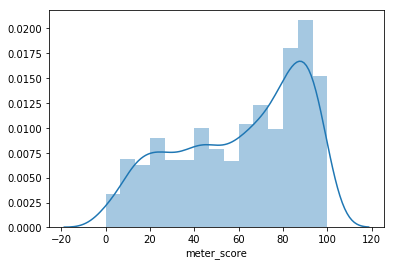

In [137]:
sns.distplot(df_update['meter_score'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


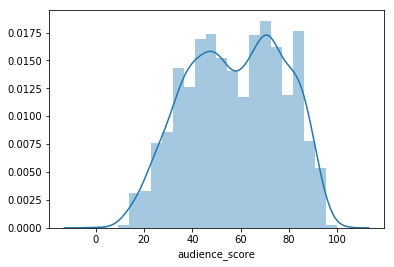

In [154]:
sns.distplot(df_update['audience_score'])

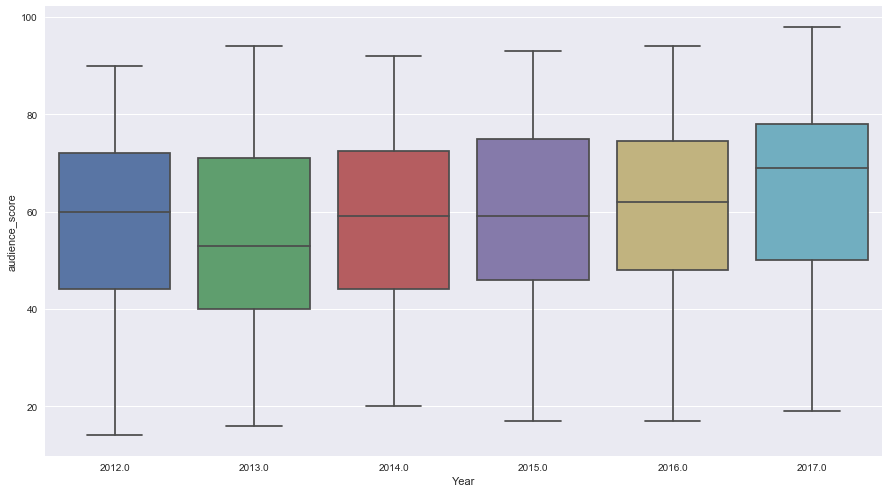

In [156]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(x=df_update['Year'], y=df_update['audience_score'])

In [ ]:
sns.distplot(df_update['Rating'])